# Time Evolution in a Two-Level Quantum System

## 🔸 First Application: Dynamics of a Two-State System

As a first application of the formalism we have developed — including Hilbert spaces, linear operators, and time evolution — we now consider the dynamics of a **two-state quantum system**.

Such a system can represent many physically important scenarios:

- A **qubit** in quantum information theory,
- A **spin-1/2 particle** (such as an electron) in a magnetic field,
- A **two-level atom** interacting with an electromagnetic field,
- A **molecule** modeled by two coupled electronic states.

The Hilbert space of this system is the two-dimensional complex vector space $\mathbb{C}^2$, and the states are represented as linear combinations of two orthonormal basis states:

$$
|\psi(t)\rangle = c_1(t) |1\rangle + c_2(t) |2\rangle
$$

where $c_1(t), c_2(t) \in \mathbb{C}$ are time-dependent amplitudes.

---

### 🔹 Time Evolution Operator

We are interested in solving the **time-dependent Schrödinger equation**:

$$
i\hbar \frac{d}{dt} |\psi(t)\rangle = \hat{H}(t) |\psi(t)\rangle
$$

where $\hat{H}(t)$ is the **Hamiltonian operator** describing the system.

Our first goal will be to **explicitly calculate the time-evolution operator** $\hat{U}(t)$ satisfying:

$$
|\psi(t)\rangle = \hat{U}(t) |\psi(0)\rangle
$$

where $\hat{U}(t)$ encodes the full dynamics of the system from an initial time $t = 0$ to time $t$.

---

### 🔹 Two Important Cases

We will study two physically distinct situations:

1. **Resonant Case**  
   - The energy difference between the two states matches the driving field frequency exactly.
   - This leads to **Rabi oscillations** with maximum population transfer between the states.

2. **Non-Resonant Case**  
   - The driving field frequency differs from the energy gap between the states (detuning).
   - The dynamics are more complex, and the amplitude of oscillations is reduced.

Both cases will allow us to visualize fundamental quantum phenomena such as **coherent oscillations**, **population transfer**, and the role of **detuning**.

---

### 🧠 Why This Example Matters

- It illustrates **the full power of the operator formalism**.
- It introduces practical methods like **matrix exponentials** and **diagonalization**.
- It builds a bridge to important applications such as **quantum optics**, **NMR**, and **quantum computing**.



In [1]:
import sympy as sp
from sympy import I

# Define Pauli-Matrices

In [2]:
X = sp.Matrix([[0,1],[1,0]])
Y = sp.Matrix([[0,-I],[I,0]])
Z = sp.Matrix([[1,0],[0,-1]])
Id = sp.eye(2)

# Two Level System Hamiltonian

In [3]:
H0, Delta, V_re, V_im = sp.symbols('H0 Delta V_re V_im', real = True)
H = H0*Id +V_re*X+V_im*Y+Delta*Z

# Rabi Oscillations

In [4]:
H = H.subs({H0:0, Delta: 0, V_im :0})

In [5]:
t = sp.symbols('t', real = True)
hbar = sp.symbols('hbar', real = True, positive = True)
Ht = -H*I*t/hbar
U = sp.simplify(Ht.exp())

In [6]:
psi0 = sp.Matrix([1,0])
pop = psi0.T * U * psi0
pop

Matrix([[cos(V_re*t/hbar)]])

We the numerical application of the time-evolution operator in quantum mechanics using a simple Python implementation.
We will consider a two-level system driven by a time-dependent Gaussian coupling.


# Theoretical Background
 
 In quantum mechanics, the time evolution of a state vector |\psi(t)\rangle is governed by the time-dependent Schrödinger equation:
 
 $$
 i \hbar \frac{d}{dt} |\psi(t)\rangle = H(t) |\psi(t)\rangle
 $$
 
 For a small time step $ dt $, the solution can be approximated by applying the unitary time evolution operator:
 
 $$
 |\psi(t + dt)\rangle = e^{-i H(t) dt / \hbar} |\psi(t)\rangle
 $$
 
 In the following, we set $ \hbar = 1 $.

# The `MultiLevel` Class Implementation
 
 We implement a simple Python class to define and propagate quantum states in an N-level system.


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import numpy as np
from scipy.linalg import expm

class MultiLevel:
    def __init__(self, ndim=2):
        self.ndim = ndim
        self.h = np.zeros((ndim, ndim), dtype=complex)  
        self.V = lambda t: np.zeros((ndim, ndim), dtype=complex)  
        
    def set_hamiltonian(self, diagonal):
        np.fill_diagonal(self.h, diagonal)

    def set_coupling(self, V_func):
        self.V = V_func

    def getH(self, t):
        return self.h + self.V(t)

    def propagate(self, psi0, dt, nstep):

        psi0 = np.asarray(psi0, dtype=complex)
        psi_t = np.zeros((nstep + 1, self.ndim), dtype=complex)
        psi_t[0] = psi0

        for i in range(1, nstep + 1):
            t = (i - 1) * dt
            H = self.getH(t)
            U = expm(-1j * H * dt)
            psi_t[i] = U @ psi_t[i - 1]

        return psi_t


#  Two-Level System with time-dependent coupling modelling excitation with a Gaussian-shaped laser field

 Consider a two-level system with energies $ E_0 = 0 $, $ E_1 = \Delta $, and a Gaussian coupling:

 $$
 V_{01}(t) = V_0 \cdot \exp\left( -\frac{(t - t_0)^2}{2 \sigma^2} \right)\cos(\omega t)
 $$



# System parameters


In [9]:
Delta = 1.0     # Energy difference
V0 = 0.1        # Coupling strength
sigma = 10.0     # Width of Gaussian
t0 = 40.0       # Center of Gaussian
omega = 1.0-.1     # Frequency of a light-field

# Time-dependent coupling


In [10]:
coupling = lambda t: np.array([[0, V0 * np.exp(-((t - t0)**2) / (2 * sigma**2)) *np.cos(omega*t) ],
                               [V0 * np.exp(-((t - t0)**2) / (2 * sigma**2))*np.cos(omega*t) , 0]], dtype=complex)


# Initialize system


In [11]:
sys = MultiLevel(ndim=2)
sys.set_hamiltonian([0, Delta])
sys.set_coupling(coupling)
psi0=np.array([1.0,0.0],dtype = complex)


# Propagation

In [12]:
nstep = 1000
dt = 0.1
psi_t = sys.propagate(psi0, dt, nstep)

# Plot results

In [13]:
pop = np.abs(psi)**2
coh = np.einsum('ti,tj->tij',psi_t.conj(),psi_t)
time = np.linspace(0,100.0,1000+1)


NameError: name 'psi' is not defined

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(time, pop[:,0], lw = 3.0, color = "red")
plt.plot(time, pop[:,1], lw = 3.0, color = "blue")
plt.plot(time, coh[:,0,1], "--")
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Two-Level System Driven by Gaussian Coupling')
plt.grid(True)

# Two-Pulse excitation

In [ ]:
Delta = 1.0     # Energy difference
V0 = .1        # Coupling strength
sigma = 10.0     # Width of Gaussian
t0 = 20.0       # Center of Gaussian
omega = 1.0     # Frequency of a light-field

In [ ]:
delay = 70
def E1(t):
    return V0 * np.exp(-((t - t0)**2) / (2 * sigma**2))*np.cos(omega*t)

coupling = lambda t: np.array([[0, E1(t)+E1(t-delay)],[E1(t)+E1(t-delay), 0]], dtype=complex)

In [ ]:
sys2 = MultiLevel(ndim=2)
sys2.set_hamiltonian([0, Delta])
sys2.set_coupling(coupling)
psi0=np.array([1.0,0.0],dtype = complex)

In [ ]:
nstep = 1000
dt = 0.1
psi_t = sys2.propagate(psi0, dt, nstep)

In [ ]:
pop = np.abs(psi_t)**2
coh = np.einsum('ti,tj->tij',psi_t.conj(),psi_t)
time = np.linspace(0,100.0,1000+1)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(time, pop[:,0], lw = 3.0, color = "red")
plt.plot(time, pop[:,1], lw = 3.0, color = "blue")
plt.plot(time, coh[:,0,1], "--")
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Two-Level System Driven by Gaussian Coupling')
plt.grid(True)

In [15]:
class BixonJortner:
    def __init__(self, Ei, Es, epsilon, V, N = 20):
        self.Ei = Ei
        self.Es = Es
        self.alpha = self.Es-self.Ei
        self.epsilon = epsilon
        self.V = V
        self.N = N

    def plot(self):
        plt.plot([0,1],[self.Ei,self.Ei], color = "r", lw = 3)
        for i in range(-self.N, self.N + 1):
            E = self.Es+i*self.epsilon
            plt.plot([2,3],[E,E], color = "blue", lw = 1)
        for state in self.e:
            plt.plot([1,2],[state,state], color = "green", lw = 1)

            
    def get_hamiltonian(self):
        self.continuum = np.array([self.Ei + self.alpha + i*self.epsilon for i in range(-self.N, self.N + 1)])
        self.dim = 2*self.N + 2
        self.h = np.zeros((self.dim, self.dim))
        self.h[0,0] = self.Ei
        self.h[0,1:] = self.V
        self.h[1:,0] = self.V
        self.h[1:,1:] = np.diag(self.continuum) 
    
    def get_eigenstates(self):
        self.e,self.psi = np.linalg.eigh(self.h)
    
    def propagate(self, dt, nstep):
        psi0 = np.zeros(self.dim)
        psi0[0] = 1.0
        psi_t = np.zeros((nstep + 1, self.dim), dtype=complex)
        U = expm(-1j * self.h * dt) 
        psi_t[0] = psi0

        for i in range(1, nstep + 1):
            psi_t[i] = U @ psi_t[i - 1]
        return psi_t
    

In [55]:
epsilon = 0.002
V = 5 * epsilon
Ei = 100
Es = 100
bj = BixonJortner(Ei,Es,epsilon,V, N = 200)
bj.get_hamiltonian()
#bj.get_eigenstates()
psi_t = bj.propagate(.1,10000)

(0.0, 1000.0)

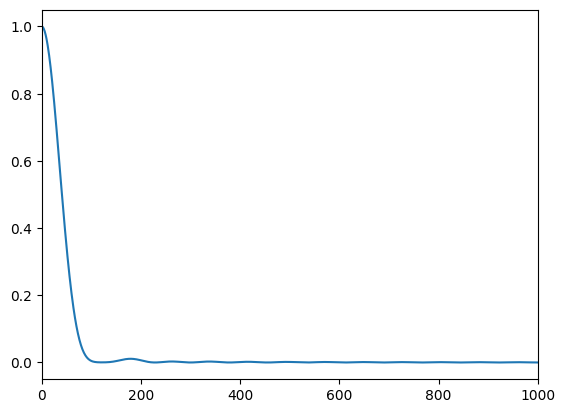

In [56]:
psi_i = psi_t[:,0]
plt.plot(np.abs(psi_i)**2)
plt.xlim(0,1000)